# (28) N=192 -- GABAN

**Motivation**: A new beginning with $N=192$ parcellation on GABAN. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Setup

In [2]:
mice = Mice(192)

[PROGRESS] 'config.json' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3

ROI lookup not found, time to run organize_func() . . .

In [4]:
%%time

mice.parcel.fit_parcel(frac=0.4)

Parcellation not found, initiating fit

[PROGRESS] fit columnar: initiated

[PROGRESS] kmeans fit: done

[PROGRESS] save 2D, 10um: done

[PROGRESS] 2d --> 3d: done

[PROGRESS] save 3D, 10um: done

[PROGRESS] downsample: done

num regions,    left: 576,  right: 576
region id diff,         r - l:  Counter({576: 576})

[PROGRESS] fit columnar: done

[PROGRESS] fit subcortical: initiated

[PROGRESS] fit subcortical: done

[PROGRESS] create regions df: done

[PROGRESS] erode: done

[PROGRESS] 'cols_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'brain_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'subcortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'cortex-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'brain-eroded_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'nonzero-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'region-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'region-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'region-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'shape_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'shape_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'shape_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'regions.df' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'fit_meta.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] save results: done.

CPU times: user 58min 48s, sys: 26min 44s, total: 1h 25min 32s
Wall time: 14min 40s


In [6]:
len(unique_idxs(mice.parcel['brain']))

2358

In [7]:
len(unique_idxs(mice.parcel['brain'])) - mice.cfg.nn * 3 * 2

1206

In [8]:
df = mice.parcel.df.copy()

ids_ctx = df.loc[df['acro'] == 'Isocortex', 'id'].values
ids_subctx = df.loc[df['acro'] != 'Isocortex', 'id'].values

len(ids_ctx), len(ids_subctx)

(1152, 1206)

In [10]:
len(ids_ctx) / 2

576.0

In [11]:
192 * 3

576

In [12]:
ids_present = unique_idxs(mice.parcel['brain'])

In [13]:
intersection = set(ids_present).intersection(ids_ctx)
intersection = sorted(intersection)
len(intersection)

1152

In [14]:
len(intersection) / 2

576.0

In [15]:
delta = sorted(set(ids_ctx).difference(ids_present))
delta

[]

In [16]:
df.loc[df['id'].isin(delta)]

,id,acro,hemis,region,layer


In [ ]:
sum(mice.parcel.fit_meta['subctx_num'].values())

In [ ]:
mice.parcel.fit_meta

## Do the masks

In [2]:
from register.register import Register

mice = Mice(
    cfg=192,
    full_load=True,
    load_allen=True,
    load_parcel=True,
)
reg = Register(mice)

ROI lookup not found, time to run organize_func() . . .

In [ ]:
obj_all = reg.register_anat(
    save_results=True,
    anchor_ses=2,
)

## Next steps

- Next, copied masks to Yale server, ran ```./do_xform.sh```, and copied the resulting 2d masks back to my local computer.
- Next, ran ```time ./run_register.sh 192 3 0 0.2```
- Next, ran ```./run_network.sh 192 3 bold rest```
- Next, ran ```time ./loop_svinet.sh ... . . .  ```

## Quickly check how many ROIs missing BOLD

In [7]:
mice = Mice(cfg=192)
mice.setup_func_data()
mice.kws

{
    'task': 'rest',
    'exclude': True,
    'runs_only': True,
    'band_ca2': (0.01, 5.0),
    'band_bold': (0.01, 0.5),
    'desc_ca2': 'preproc',
    'desc_bold': 'rabies-hp'
}

In [8]:
len(mice.bold)

114

In [9]:
bad_all = []
for key in mice.bold:
    data = Base(
        mice,
        key=key,
        mode='bold-lite',
        prep_data=True,
    ).data
    bad = np.isnan(data).sum(1) > 0
    bad_all.append(bad.sum())

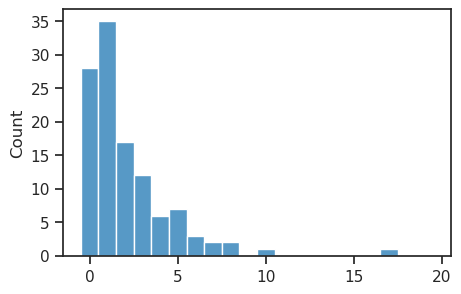

In [14]:
sns.histplot(bad_all, bins=np.linspace(0, 20, 21) - 0.5);